# [Question 1] Single Layter Perceptron

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data 읽어들이기
iris=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
# 변수 이름 부여
iris.columns= ['sl','sw','pl','pw','name']
print(iris.head())
# 데이터 관찰
print(iris['name'].value_counts())
#각 꽃 타입마다 50개씩의 데이터가 있음.

    sl   sw   pl   pw         name
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: name, dtype: int64


    sl   sw   pl   pw         name
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
Iris-setosa        50
Iris-versicolor    50
Name: name, dtype: int64
     sl   sw   pl   pw             name
50  7.0  3.2  4.7  1.4  Iris-versicolor
51  6.4  3.2  4.5  1.5  Iris-versicolor
52  6.9  3.1  4.9  1.5  Iris-versicolor
53  5.5  2.3  4.0  1.3  Iris-versicolor
54  6.5  2.8  4.6  1.5  Iris-versicolor
Iris-versicolor    50
Iris-virginica     50
Name: name, dtype: int64


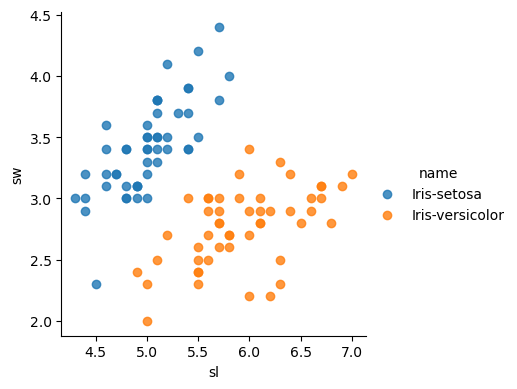

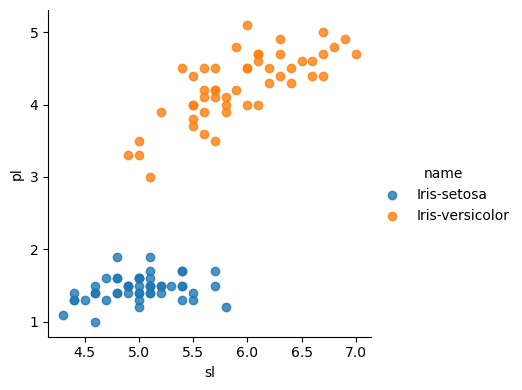

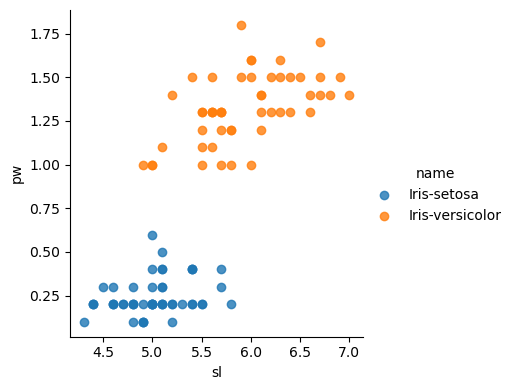

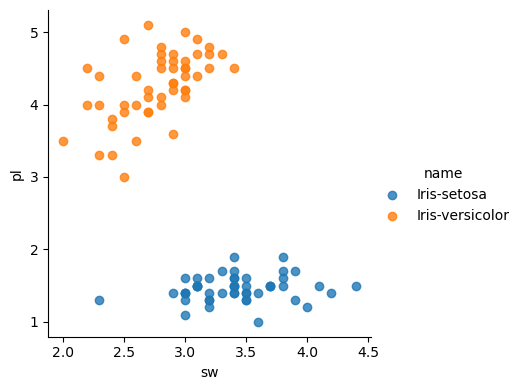

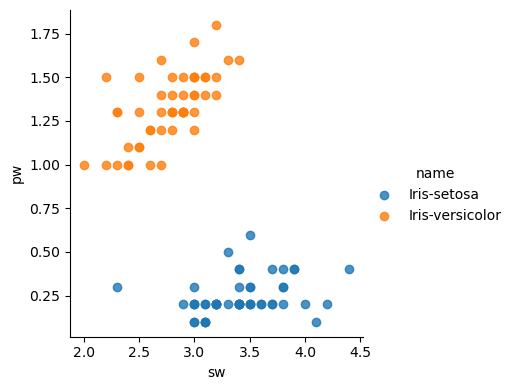

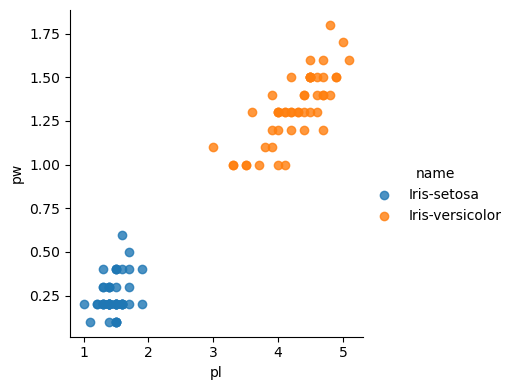

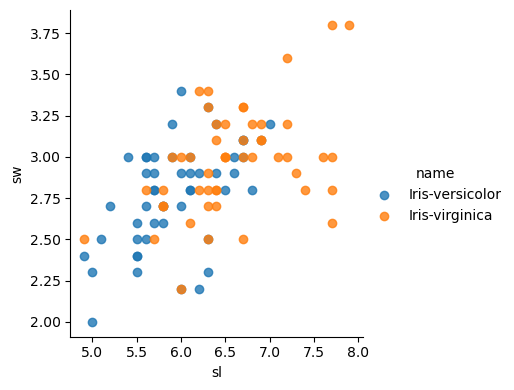

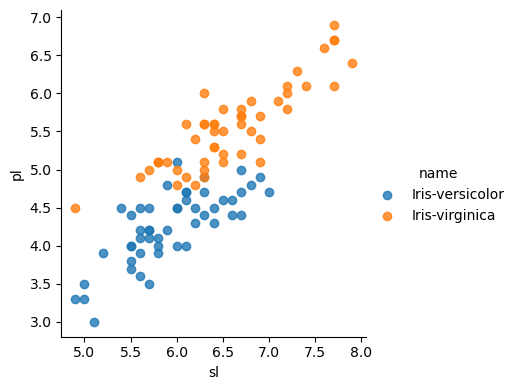

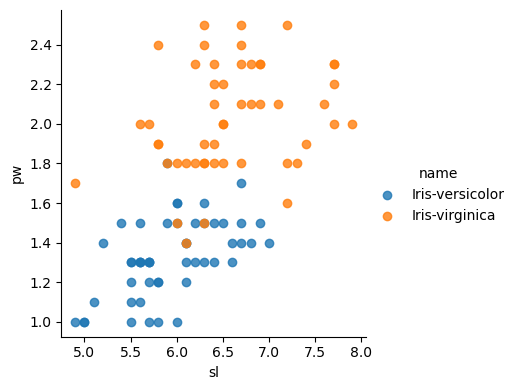

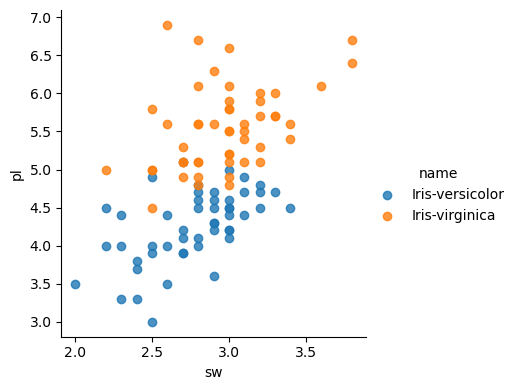

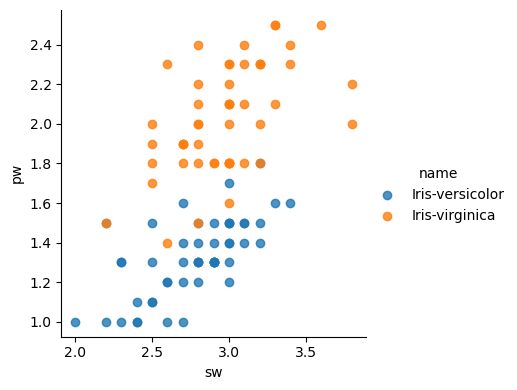

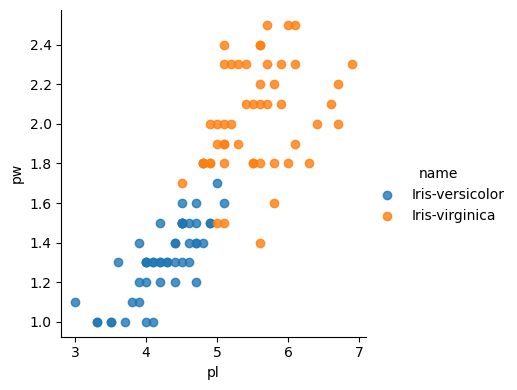

In [2]:
# 2개의 flower type만 비교하기 위해 데이터 축소하기
# (1) setosa와 versicolor
temp=iris.copy().truncate(after=99)
# 데이터 관찰
print(temp.head())
print(temp['name'].value_counts())
# 6개의 combination 관찰
sns.lmplot(x='sl',y='sw', data=temp, hue='name',fit_reg=False, height=4, aspect=1)
sns.lmplot(x='sl',y='pl', data=temp, hue='name',fit_reg=False, height=4, aspect=1)
sns.lmplot(x='sl',y='pw', data=temp, hue='name',fit_reg=False, height=4, aspect=1)
sns.lmplot(x='sw',y='pl', data=temp, hue='name',fit_reg=False, height=4, aspect=1)
sns.lmplot(x='sw',y='pw', data=temp, hue='name',fit_reg=False, height=4, aspect=1)
sns.lmplot(x='pl',y='pw', data=temp, hue='name',fit_reg=False, height=4, aspect=1)

# (2) versicolor와 virginica
temp=iris.copy().truncate(before=50)
# 데이터 관찰
print(temp.head())
print(temp['name'].value_counts())
# 6개의 combination 관찰
sns.lmplot(x='sl',y='sw', data=temp, hue='name',fit_reg=False, height=4, aspect=1)
sns.lmplot(x='sl',y='pl', data=temp, hue='name',fit_reg=False, height=4, aspect=1)
sns.lmplot(x='sl',y='pw', data=temp, hue='name',fit_reg=False, height=4, aspect=1)
sns.lmplot(x='sw',y='pl', data=temp, hue='name',fit_reg=False, height=4, aspect=1)
sns.lmplot(x='sw',y='pw', data=temp, hue='name',fit_reg=False, height=4, aspect=1)
sns.lmplot(x='pl',y='pw', data=temp, hue='name',fit_reg=False, height=4, aspect=1)

# 구분이 더 명확한 (1) setosa와 versicolor를 사용하기로 결정.

In [5]:
# step function 정의
def step_func (threshold, x):
    if x<threshold:
        return 0
    return 1

# 변수 설정
n_trials=1000
n_test= 15 # test vector의 수
alpha=0.01 # learning rate

# input 설정
X1=iris.loc[0:99,'sl']
X2=iris.loc[0:99,'sw']
X=pd.concat([X1,X2],axis=1)
#print(X.shape)

# output 설정
T=iris.loc[0:99,'name']

# trial set과 test set 나누기
test_set=pd.DataFrame()
T_test=pd.DataFrame()
for i in range(15):
    row = np.random.randint(0,len(X)-1)
    test_set[i]=X.iloc[row,:]
    X.drop([X.index[row]], axis=0, inplace=True)
    T_test[i]=T.iloc[row]
    T.drop([T.index[row]], axis=0, inplace=True)
trial_set=X.copy()
test_set=test_set.transpose()

T_trial=T.copy()
T_trial=T_trial.to_numpy()  
T_trial=np.where(T=='Iris-setosa',1,0)
T_text=T_test.transpose()
T_test=T_test.to_numpy()  
T_test=np.where(T=='Iris-setosa',1,0)


# 학습 준비
X=X.to_numpy()
trial_set=trial_set.to_numpy()
test_set=test_set.to_numpy()
W=np.random.randn(3) # weight, 표준정규분포에서 난수 생성
hit_array=[]  

# 학습 과정
for i in range(n_trials):
    for j in range(len(trial_set)):
        s=np.dot(trial_set[j],W[1:])+W[0]
        # back propagation - delta rule
        delta=alpha*(T_trial[j]-step_func(0,s)) # threshold = 0
        
        # weight update
        W[1:]+=delta*trial_set[j]
        W[0]+=delta
        
    hit=0
    for i in range(n_test):
        s=np.dot(test_set[i],W[1:])+W[0]
        delta=(T_test[i]-step_func(s, 0))
        if delta!=0:
            hit+=1
    hit_array.append(hit)

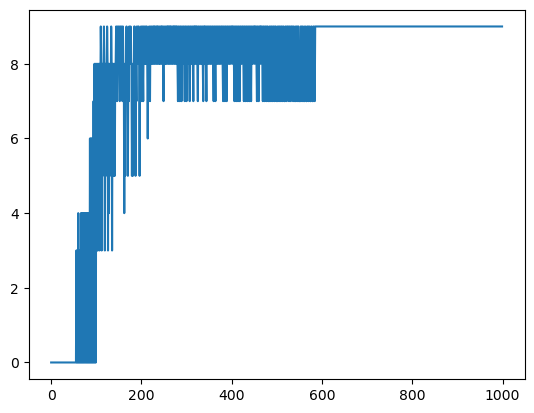

In [6]:
plt.plot(hit_array)
plt.show()

# [Question2] Multi-layer perceptron

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

class mPerceptron:
    
    def __init__(self, n_input, n_hidden, n_output, a):
        self.n_input = n_input 
        self.n_hidden = n_hidden
        self.n_output = n_output
        self.a = a 
          
        # hidden layer weights
        limit = 1 / np.sqrt(self.n_input)
        self.W_i_h = np.random.uniform(-limit, limit, (self.n_input, self.n_hidden))
        self.bias0 = np.zeros((1, self.n_hidden))
        
        # output weights
        limit = 1 / np.sqrt(self.n_hidden)
        self.W_h_o = np.random.uniform(-limit, limit, (self.n_hidden, self.n_output))
        self.bias1 = np.zeros((1, self.n_output))
        
        
    def step_func1(self, x):
        return 1/(1+np.exp(-x)) # sigmoid function
    
    def step_func2(self, x):
        e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
        return e_x / np.sum(e_x, axis=-1, keepdims=True)  # softmax function
        
    def train(self, inputs, target):
        # 2차원 메트릭스로 data format 전환
        I=np.array(inputs, ndmin=2)
        T=np.array(target, ndmin=2)
                
        # Forward propagation
        hsum=np.dot(I, self.W_i_h)+self.bias0 
        H=self.step_func1(hsum)
        osum=np.dot(H,self.W_h_o)+self.bias1 
        Y=self.step_func2(osum)
            
        # Error calculation
        delta=T-Y
        # Hidden layer Error 
        hdelta=np.dot(delta, self.W_h_o.T)
        
            
        # Now update the weight and bias
        self.W_h_o += self.a*np.dot(H.T, delta*Y*(1-Y))
        self.W_i_h += self.a*np.dot(I.T, hdelta*H*(1-H))
                
    def test(self, inputs):
        #format array
        I=np.array(inputs, ndmin=2)
        
        #Forward propagation
        hsum=np.dot(I, self.W_i_h)+self.bias0
        H=self.step_func1(hsum)
        osum=np.dot(H,self.W_h_o)+self.bias1
        Y=self.step_func2(osum)
        
        return Y

In [45]:
## 데이터 준비
# input data
X=iris.iloc[0:150,:4]
X/=[7.9,4.4,6.9,2.5]

# target data
temp=pd.get_dummies(iris.iloc[:,4])
temp.replace({1:0.99,0:0.01},inplace=True)
T=temp.iloc[0:150,:3]

# trial set과 test set 나누기
X_test=pd.DataFrame()
T_test=pd.DataFrame()
for i in range(30):
    row = np.random.randint(0,len(X)-1)
    X_test[i]=X.iloc[row,:]
    X.drop([X.index[row]], axis=0, inplace=True)
    T_test[i]=T.iloc[row]
    T.drop([T.index[row]], axis=0, inplace=True)

X_trial=X.copy().to_numpy()
X_test=X_test.transpose().to_numpy()
T_trial=T.copy().to_numpy()
T_test=T_test.transpose().to_numpy()

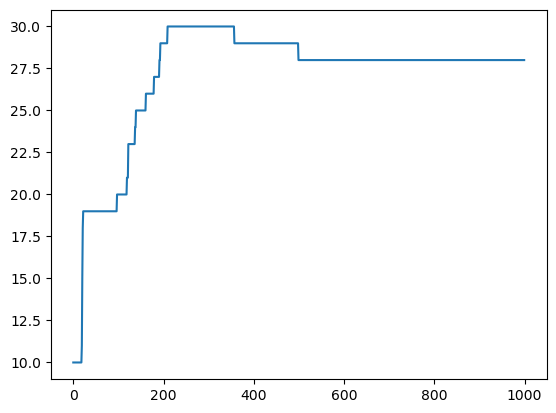

Accuracy:  90.01 %


In [50]:
# (1) hidden node가 5개, learning rate가 0.01인 경우
# 변수 설정 
number_of_input = 4
number_of_hidden = 5
number_of_output = 3
learning_rate = 0.01
hit_array = []

n_trial = 1000
n_test = 30


# 실행
running = mPerceptron(number_of_input, number_of_hidden, number_of_output, learning_rate)

# trial set로 학습시키기
for j in range(n_trial):    
    for i in range (len(X)-1):
            running.train(X_trial[i],T_trial[i])
            
# 학습이 잘 되었는지 테스트하기
    hit=0
    for i in range(n_test):          
        if((np.argmax(T_test[i])) == (np.argmax(running.test(X_test[i])))):
            hit+=1

    hit_array.append(hit)

plt.plot(hit_array)
plt.show()
accuracy_score = (np.mean(hit_array) / n_test) * 100
print("Accuracy: ", round(accuracy_score, 2), "%")

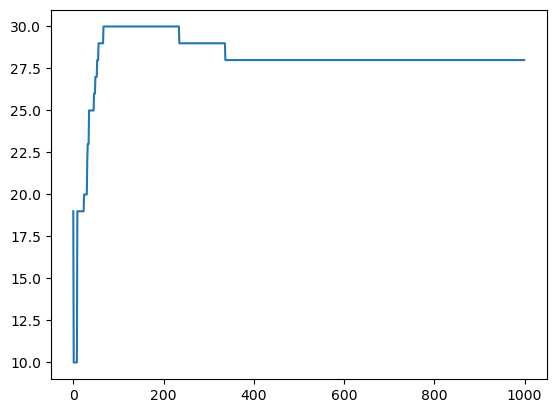

Accuracy:  93.47 %


In [51]:
# (2) hidden node가 5개, learning rate가 0.05인 경우
# 변수 설정 
number_of_input = 4
number_of_hidden = 5
number_of_output = 3
learning_rate = 0.05
hit_array = []

n_trial = 1000
n_test = 30


# 실행
running = mPerceptron(number_of_input, number_of_hidden, number_of_output, learning_rate)

# trial set로 학습시키기
for j in range(n_trial):    
    for i in range (len(X)-1):
            running.train(X_trial[i],T_trial[i])
            
# 학습이 잘 되었는지 테스트하기
    hit=0
    for i in range(n_test):          
        if((np.argmax(T_test[i])) == (np.argmax(running.test(X_test[i])))):
            hit+=1

    hit_array.append(hit)

plt.plot(hit_array)
plt.show()
accuracy_score = (np.mean(hit_array) / n_test) * 100
print("Accuracy: ", round(accuracy_score, 2), "%")

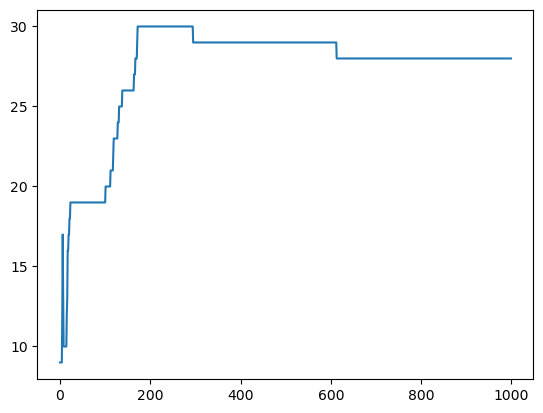

Accuracy:  90.78 %


In [52]:
# (3) hidden node가 12개, learning rate가 0.01인 경우
# 변수 설정 
number_of_input = 4
number_of_hidden = 12
number_of_output = 3
learning_rate = 0.01
hit_array = []

n_trial = 1000
n_test = 30


# 실행
running = mPerceptron(number_of_input, number_of_hidden, number_of_output, learning_rate)

# trial set로 학습시키기
for j in range(n_trial):    
    for i in range (len(X)-1):
            running.train(X_trial[i],T_trial[i])
            
# 학습이 잘 되었는지 테스트하기
    hit=0
    for i in range(n_test):          
        if((np.argmax(T_test[i])) == (np.argmax(running.test(X_test[i])))):
            hit+=1

    hit_array.append(hit)

plt.plot(hit_array)
plt.show()
accuracy_score = (np.mean(hit_array) / n_test) * 100
print("Accuracy: ", round(accuracy_score, 2), "%")

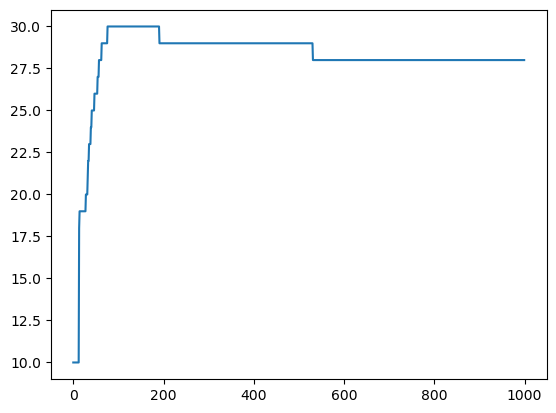

Accuracy:  93.66 %


In [53]:
# (4) hidden node가 12개, learning rate가 0.05인 경우
# 변수 설정 
number_of_input = 4
number_of_hidden = 12
number_of_output = 3
learning_rate = 0.05
hit_array = []

n_trial = 1000
n_test = 30


# 실행
running = mPerceptron(number_of_input, number_of_hidden, number_of_output, learning_rate)

# trial set로 학습시키기
for j in range(n_trial):    
    for i in range (len(X)-1):
            running.train(X_trial[i],T_trial[i])
            
# 학습이 잘 되었는지 테스트하기
    hit=0
    for i in range(n_test):          
        if((np.argmax(T_test[i])) == (np.argmax(running.test(X_test[i])))):
            hit+=1

    hit_array.append(hit)

plt.plot(hit_array)
plt.show()
accuracy_score = (np.mean(hit_array) / n_test) * 100
print("Accuracy: ", round(accuracy_score, 2), "%")

# [Question3] Multilayer Perceptron for wine dataset

In [57]:
# Data 읽어들이기
wine_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
print(wine_data.head)
print(wine_data.shape)
# 첫번째 열이 와인의 종류 (target category)

<bound method NDFrame.head of      0      1     2     3     4    5     6     7     8     9      10    11  \
0     1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.64  1.04   
1     1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
2     1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
3     1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
4     1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
..   ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
173   3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
174   3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
175   3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
176   3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
177   3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

       12    13  
0    3.92  1065

In [73]:
## 데이터 준비
# input data
X=wine_data.iloc[0:178,1:14]
T=wine_data.iloc[0:178,0]

# trial set과 test set 나누기
X_test=pd.DataFrame()
T_test=[]
for i in range(30):
    row = np.random.randint(0,len(X)-1)
    X_test[i]=X.iloc[row,:]
    X.drop([X.index[row]], axis=0, inplace=True)
    T_test.append(T.iloc[row])
    T.drop([T.index[row]], axis=0, inplace=True)

X_trial=X.copy()
X_trial=X_trial.to_numpy()
X_test=X_test.transpose()
X_test=X_test.to_numpy()
T_trial=T.copy()
T_trial=T_trial.to_numpy()
T_test=np.array(T_test)

print(X_trial.shape)
print(X_test.shape)
print(T_trial.shape)
print(T_test.shape)

(148, 13)
(30, 13)
(148,)
(30,)


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

class mPerceptron:
    
    def __init__(self, n_input, n_hidden, n_output, a):
        self.n_input = n_input 
        self.n_hidden = n_hidden
        self.n_output = n_output
        self.a = a 
          
        # hidden layer weights
        limit = 1 / np.sqrt(self.n_input)
        self.W_i_h = np.random.uniform(-limit, limit, (self.n_input, self.n_hidden))
        self.bias0 = np.zeros((1, self.n_hidden))
        
        # output weights
        limit = 1 / np.sqrt(self.n_hidden)
        self.W_h_o = np.random.uniform(-limit, limit, (self.n_hidden, self.n_output))
        self.bias1 = np.zeros((1, self.n_output))
        
        
    def step_func1(self, x):
        return 1/(1+np.exp(-x)) # sigmoid function
    
    def step_func2(self, x):
        e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
        return e_x / np.sum(e_x, axis=-1, keepdims=True)  # softmax function
        
    def train(self, inputs, target):
        # 2차원 메트릭스로 data format 전환
        I=np.array(inputs, ndmin=2)
        T=np.array(target, ndmin=2)
                
        # Forward propagation
        hsum=np.dot(I, self.W_i_h)+self.bias0 
        H=self.step_func1(hsum)
        osum=np.dot(H,self.W_h_o)+self.bias1 
        Y=self.step_func2(osum)
            
        # Error calculation
        delta=T-Y
        # Hidden layer Error 
        hdelta=np.dot(delta, self.W_h_o.T)
        
            
        # Now update the weight and bias
        self.W_h_o += self.a*np.dot(H.T, delta*Y*(1-Y))
        self.W_i_h += self.a*np.dot(I.T, hdelta*H*(1-H))
                
    def test(self, inputs):
        #format array
        I=np.array(inputs, ndmin=2)
        
        #Forward propagation
        hsum=np.dot(I, self.W_i_h)+self.bias0
        H=self.step_func1(hsum)
        osum=np.dot(H,self.W_h_o)+self.bias1
        Y=self.step_func2(osum)
        
        return Y

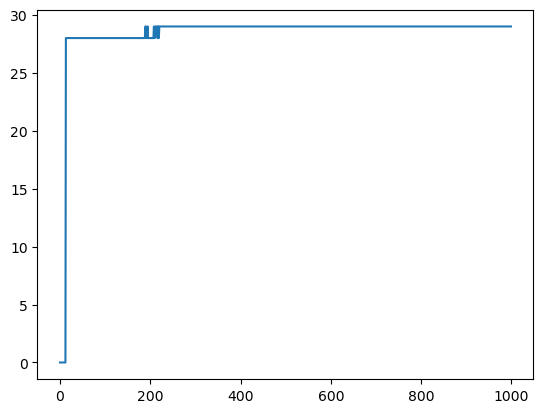

Accuracy:  94.76 %


In [75]:
# 변수 설정 
number_of_input = 13
number_of_hidden = 5
number_of_output = 3
learning_rate = 0.05
hit_array = []

n_trial = 1000
n_test = 30


# 실행
running = mPerceptron(number_of_input, number_of_hidden, number_of_output, learning_rate)

# trial set로 학습시키기
for j in range(n_trial):    
    for i in range (len(X)-1):
            running.train(X_trial[i],T_trial[i])
            
# 학습이 잘 되었는지 테스트하기
    hit=0
    for i in range(n_test):          
        if((np.argmax(T_test[i])) == (np.argmax(running.test(X_test[i])))):
            hit+=1

    hit_array.append(hit)

plt.plot(hit_array)
plt.show()
accuracy_score = (np.mean(hit_array) / n_test) * 100
print("Accuracy: ", round(accuracy_score, 2), "%")